In [0]:
import pandas as pd
import matplotlib.pyplot as plt

In [146]:
df1=pd. read_csv("testdata.csv")
df1.columns=['SerialNumber', 'Tehsil', 'Block',
                        'Village', 'FullName', 'FathersFullName',
                        'Age', 'Sex', 'PhoneNumber',
                        'IDProof', 'IDNumber', 'ArrivalDate',
                        'SourceCity', 'SourceCheckup', 'Skill', 'YrsExp',
                        'OtherSkills', 'CompanyName', 'Comments']
df1.head(5)



,SerialNumber,Tehsil,Block,Village,FullName,FathersFullName,Age,Sex,PhoneNumber,IDProof,IDNumber,ArrivalDate,SourceCity,SourceCheckup,Skill,YrsExp,OtherSkills,CompanyName,Comments
0,1,BASTI SADAR,BAHADUR PUR,Deidentified,Deidentified,Deidentified,15.0,MALE,12345678,ADHAR,9999999999,09-05-2020,MUMBAI,YES,LABOUR,7 MONTH,NaN,NaN,NaN
1,2,BASTI SADAR,BAHADUR PUR,Deidentified,Deidentified,Deidentified,22.0,MALE,12345678,ADHAR,9999999999,09-05-2020,MUMBAI,YES,LABOUR,5 MONTHS,NaN,NaN,NaN
2,3,BASTI SADAR,Bahadur pur,Deidentified,Deidentified,Deidentified,20.0,F,12345678,NaN,9999999999,29-04-2020,Prayagraj,YES,NaN,NaN,NaN,NaN,NaN
3,4,BASTI SADAR,Bahadur pur,Deidentified,Deidentified,Deidentified,21.0,M,12345678,NaN,9999999999,29-04-2020,Prayagraj,YES,NaN,NaN,NaN,NaN,NaN
4,5,BASTI SADAR,Bahadur pur,Deidentified,Deidentified,Deidentified,21.0,M,12345678,NaN,9999999999,29-04-2020,Prayagraj,YES,NaN,NaN,NaN,NaN,NaN


In [147]:

print("Current Unique values in Sex (and counts):")


df1['Sex'].value_counts(ascending=True)


Current Unique values in Sex (and counts):


म           1
म0          2
FEMALE      2
ड           2
F          40
MALE       56
पु0        80
M         526
Name: Sex, dtype: int64

In [148]:
df1 = df1.copy() 

df1.replace(["MALE","पु0"], 
           "M", 
           inplace=True)
df1.replace(["FEMALE","म0","म"], 
           "F", 
           inplace=True)
df1.replace(["nan","ड"],
            "U",
            inplace=True)

print("Updated unique values in Sex:")

df1['Sex'].value_counts(ascending=True)

Updated unique values in Sex:


U      2
F     45
M    662
Name: Sex, dtype: int64

In [149]:

df1.head(5)

,SerialNumber,Tehsil,Block,Village,FullName,FathersFullName,Age,Sex,PhoneNumber,IDProof,IDNumber,ArrivalDate,SourceCity,SourceCheckup,Skill,YrsExp,OtherSkills,CompanyName,Comments
0,1,BASTI SADAR,BAHADUR PUR,Deidentified,Deidentified,Deidentified,15.0,M,12345678,ADHAR,9999999999,09-05-2020,MUMBAI,YES,LABOUR,7 MONTH,NaN,NaN,NaN
1,2,BASTI SADAR,BAHADUR PUR,Deidentified,Deidentified,Deidentified,22.0,M,12345678,ADHAR,9999999999,09-05-2020,MUMBAI,YES,LABOUR,5 MONTHS,NaN,NaN,NaN
2,3,BASTI SADAR,Bahadur pur,Deidentified,Deidentified,Deidentified,20.0,F,12345678,NaN,9999999999,29-04-2020,Prayagraj,YES,NaN,NaN,NaN,NaN,NaN
3,4,BASTI SADAR,Bahadur pur,Deidentified,Deidentified,Deidentified,21.0,M,12345678,NaN,9999999999,29-04-2020,Prayagraj,YES,NaN,NaN,NaN,NaN,NaN
4,5,BASTI SADAR,Bahadur pur,Deidentified,Deidentified,Deidentified,21.0,M,12345678,NaN,9999999999,29-04-2020,Prayagraj,YES,NaN,NaN,NaN,NaN,NaN


In [150]:
print("Block names before cleaning")

df1['Block'].value_counts(ascending=True)


Block names before cleaning


Bhadhur          1
BAHDURPUR        2
Bahdhur          2
BAHDURPR         3
Bahadur Pur      3
Bhadhurpur       4
Bahadur pur      5
Bhadhur pur      6
BHADURPUR        7
BHADHURPUR       9
BHADHUR         11
BAHADUR PUR     61
BHADHUR PUR     69
बहादुरपुर       80
BAHADURPUR     447
Name: Block, dtype: int64

In [151]:

print("Block names after cleaning:")
df1.replace(["Bhadhur","BAHDURPUR","Bahdhur","BAHDURPR","Bahadur Pur","Bhadhurpur","Bahadur pur","Bhadhur pur","BHADURPUR","BHADHURPUR","BHADHUR","BAHADUR PUR","BHADHUR PUR","बहादुरपुर","BAHADURPUR"], 
           "BAHADURPUR", 
           inplace=True)
df1['Block'].value_counts(ascending=True)



Block names after cleaning:


BAHADURPUR    710
Name: Block, dtype: int64

In [0]:

df2=pd.read_csv("cityreplacement.csv")

In [0]:
df1.loc[df1.SourceCity.isin(df2['Current Value']),['SourceCity']]=df2['New Value']

In [154]:
df1.head(5)

,SerialNumber,Tehsil,Block,Village,FullName,FathersFullName,Age,Sex,PhoneNumber,IDProof,IDNumber,ArrivalDate,SourceCity,SourceCheckup,Skill,YrsExp,OtherSkills,CompanyName,Comments
0,1,BASTI SADAR,BAHADURPUR,Deidentified,Deidentified,Deidentified,15.0,M,12345678,ADHAR,9999999999,09-05-2020,Mumbai,YES,LABOUR,7 MONTH,NaN,NaN,NaN
1,2,BASTI SADAR,BAHADURPUR,Deidentified,Deidentified,Deidentified,22.0,M,12345678,ADHAR,9999999999,09-05-2020,Prayagraj,YES,LABOUR,5 MONTHS,NaN,NaN,NaN
2,3,BASTI SADAR,BAHADURPUR,Deidentified,Deidentified,Deidentified,20.0,F,12345678,NaN,9999999999,29-04-2020,Delhi,YES,NaN,NaN,NaN,NaN,NaN
3,4,BASTI SADAR,BAHADURPUR,Deidentified,Deidentified,Deidentified,21.0,M,12345678,NaN,9999999999,29-04-2020,Indore,YES,NaN,NaN,NaN,NaN,NaN
4,5,BASTI SADAR,BAHADURPUR,Deidentified,Deidentified,Deidentified,21.0,M,12345678,NaN,9999999999,29-04-2020,Faridabad,YES,NaN,NaN,NaN,NaN,NaN


**Challenge 2: Hard**   
Clean the YrsExp column   
This column can contain many dirty values.    
After clean up, all this column should contain is a number.   
Any years > 10 should be replaced by 10,   
and any value in months should be replaced by 0.   
    
This column can contain these values:   
['7 MONTH' '5 MONTHS' nan '2 YEARS' '1 YEAR' '6 MONTHS' '3 YEARS'
 '2 MONTHS' '5 YEAR' '7 MONTHS' '3 YEAR' '2 YEAR' '6 YEARS' '7 YEARS'
 '4 MONTHS' '4' '6' '7' '2' '8' '15' '5' '10 YEAR' '8 year' '25 YEARS' '3'
 '1' '1YEAR' '5 YEARS' '1 YERS' '06 MONTHS' '05 YEARS' '03 YEARS'
 '04 MONTHS' '02 YEARS' '03 MONTHS' '02 MONTHS' '01 YEARS' '4 YEARS' '10'
 '13' '3YEAR' '6YRS.' '5YRS.' '4YRS.' '7YRS.' '10YRS.' '9YRS.' '3 MOTH'
 '5 MONTH' '20' '6 YEAR' '33' '18' '11' '4 YEAR' '6 Month' '2 MONTH'
 '15 YEAR' '25' '40' '19' '27' '7 YEAR' '17 YEAR' '8 YEAR' '9 YEAR'
 '15 YEARS' '3 MONTH' '11 MONTHS' '6 MONTH' '11 YEARS' '10 YEARS'
 '12 YEARS' '8 MONTH' '9' '30' '12' '4 MONTH' '5 YERS' '3साल' '10साल'
 '1साल' '7साल' '5साल' '3 माह' '2 माह' '3 साल' '2 साल' '4साल' '2साल'
 '18साल' '30साल' '11साल' '40साल' '12साल' '6माह' '3माह' '13साल' '8साल'
 '3 वर्ष' '10 वर्ष' '8 माह' '7 वर्ष' '9वर्श' '3 बर्ष' '5 वर्ष' '5 माह'
 '8 वर्ष' '4 वर्ष' '2 वर्ष' '1 वर्ष' '6 माह' '4माह' '5 साल' '25 साल'
 '9 साल' '5माह' '6साल' '4Y' '20 YEARS' '40 YEAR' '5Y' '12 YEAR' '2MONTHS'
 '9o"kZ' '5o"kZ' '3o"kZ' '20o"kZ' '25o"kZ' '6MONTH' '10YEARS' '2YRS.'
 '2 YRS.' '2YRS' '1YRS' '8YRS' '2YEAR' '3YEAT' '5 YS' '8 MONTHS' '4 YS'
 '6 MTH' '15 YS' '22' '14' '30YEAR' '28' '12 साल' '1 साल' '15 साल'
 '20 साल' '10 साल' '4 साल']   
    
   
**Use your programming skills to clean this column**

In [0]:
### Clean the YrsExp Column to a number between 0 and 100
import re
month_list = ['MONTH', 'MONTHS', 'MOTH', 'माह', 'MTH']
year_list = ['YEARS', 'YEAR', 'YERS', 'YRS.', 'YRS','YS','साल','वर्ष', 'वर्श', 'Y']

In [156]:
df1['YrsExp']

0       7 MONTH
1      5 MONTHS
2           NaN
3           NaN
4           NaN
         ...   
705       6 माह
706       6 माह
707       6 माह
708       6 माह
709           3
Name: YrsExp, Length: 710, dtype: object

In [0]:
def year_clean(row):
    """
    This Function will take dataframe row as argument and 
    return column based on below condition:
        Any years > 10 should be replaced by 10,
        years<10 keep only interger value
        and any value in months should be replaced by 0.
        incorrect values -1
    """
    column_value = row['YrsExp']
    try:
        numeric_value = str(re.findall(r'\d+', column_value)[0])
        non_numeric_value = column_value.replace(numeric_value, '').strip()
        if non_numeric_value in year_list:
            if int(numeric_value)>10:
                return 10
            return numeric_value
        if non_numeric_value in month_list:
            return 0
        return -1
    except TypeError:
        return -1

In [0]:
df1['Experience']= df1.apply(year_clean, axis=1) #created a new column experience for YrsExp

In [159]:
df1['Experience'].value_counts(ascending=True)

01      1
02      1
03      2
05      2
9       4
8       7
7      10
6      15
10     19
3      27
4      31
10     32
5      33
1      35
2      37
0      79
-1    375
Name: Experience, dtype: int64

In [160]:
df1.head(20)

,SerialNumber,Tehsil,Block,Village,FullName,FathersFullName,Age,Sex,PhoneNumber,IDProof,IDNumber,ArrivalDate,SourceCity,SourceCheckup,Skill,YrsExp,OtherSkills,CompanyName,Comments,Experience
0,1,BASTI SADAR,BAHADURPUR,Deidentified,Deidentified,Deidentified,15.0,M,12345678,ADHAR,9999999999,09-05-2020,Mumbai,YES,LABOUR,7 MONTH,NaN,NaN,NaN,0
1,2,BASTI SADAR,BAHADURPUR,Deidentified,Deidentified,Deidentified,22.0,M,12345678,ADHAR,9999999999,09-05-2020,Prayagraj,YES,LABOUR,5 MONTHS,NaN,NaN,NaN,0
2,3,BASTI SADAR,BAHADURPUR,Deidentified,Deidentified,Deidentified,20.0,F,12345678,NaN,9999999999,29-04-2020,Delhi,YES,NaN,NaN,NaN,NaN,NaN,-1
3,4,BASTI SADAR,BAHADURPUR,Deidentified,Deidentified,Deidentified,21.0,M,12345678,NaN,9999999999,29-04-2020,Indore,YES,NaN,NaN,NaN,NaN,NaN,-1
4,5,BASTI SADAR,BAHADURPUR,Deidentified,Deidentified,Deidentified,21.0,M,12345678,NaN,9999999999,29-04-2020,Faridabad,YES,NaN,NaN,NaN,NaN,NaN,-1
5,6,BASTI SADAR,BAHADURPUR,Deidentified,Deidentified,Deidentified,24.0,F,12345678,NaN,9999999999,29-04-2020,Hyderabad,YES,NaN,NaN,NaN,NaN,NaN,-1
6,7,BASTI SADAR,BAHADURPUR,Deidentified,Deidentified,Deidentified,18.0,F,12345678,NaN,9999999999,29-04-2020,Gujarat,YES,NaN,NaN,NaN,NaN,NaN,-1
7,8,BASTI SADAR,BAHADURPUR,Deidentified,Deidentified,Deidentified,22.0,M,12345678,NaN,9999999999,29-04-2020,Madhya Pradesh,YES,NaN,NaN,NaN,NaN,NaN,-1
8,9,BASTI SADAR,BAHADURPUR,Deidentified,Deidentified,Deidentified,22.0,M,12345678,NaN,9999999999,29-04-2020,Andhra Pradesh,YES,NaN,NaN,NaN,NaN,NaN,-1
9,10,BASTI SADAR,BAHADURPUR,Deidentified,Deidentified,Deidentified,22.0,F,12345678,NaN,9999999999,29-04-2020,Gurugram,YES,NaN,NaN,NaN,NaN,NaN,-1


**Challenge 3: Hardest**   
Clean the city names list using fuzzy string matching. Fuzzy string matching calculates string similarity.   

Some examples:   

String 1|String2|Match Score
:-:|:-:|:-:
Mumbai | Mumabai | 92%
Mumbai | Vasai Mumbai | 66%
Mumbai | Bangalore | 13%
Bagalore | Bangalore | 94%


Using this score, we could replace both the first two examples with 

By using a list of possible options, you can look for matches that have a score higher than 60%, and replace them. You can use the list of options in the second column in this file:   

https://drive.google.com/file/d/1CTlnwK-wfmqMrQ0g6K5dbDQ_-IhpGCLm/view?usp=sharing

Read example tutorial here: https://towardsdatascience.com/how-to-do-fuzzy-matching-in-python-pandas-dataframe-6ce3025834a6   
Experiment with similarity here: https://www.tools4noobs.com/online_tools/string_similarity/

In [161]:
### Add code or code cells here to clean city list using fuzzy matching if score is more than 60%.
### Note you may need to check for मुम्बई  and Mumbai because fuzzy matching cannot work across fonts in hindi and english.
df1['SourceCity']


0         Mumbai
1      Prayagraj
2          Delhi
3         Indore
4      Faridabad
         ...    
705     अहमदाबाद
706     अहमदाबाद
707     अहमदाबाद
708     अहमदाबाद
709          NaN
Name: SourceCity, Length: 710, dtype: object

In [162]:
df2['New Value']

0        Mumbai
1     Prayagraj
2         Delhi
3        Indore
4     Faridabad
        ...    
95    Bangalore
96         Agra
97    Ahmedabad
98       Kanpur
99    Ahmedabad
Name: New Value, Length: 100, dtype: object

In [0]:
def fuzzy_merge(df1, df2, key1='SourceCity', key2='New Value', threshold=60, limit=1):
    """
    :param df_1: the left table to join
    :param df_2: the right table to join
    :param key1: key column of the left table
    :param key2: key column of the right table
    :param threshold: how close the matches should be to return a match, based on Levenshtein distance
    :param limit: the amount of matches that will get returned, these are sorted high to low
    :return: dataframe with boths keys and matches
    """
    s = df2[key2].tolist()

    m = df1[key1].apply(lambda x: process.extract(x, s, limit=limit))    
    df1['matches'] = m

    m2 = df1['matches'].apply(lambda x: ', '.join([i[0] for i in x if i[1] > threshold]))
    df1['matches'] = m2

    return df1

In [164]:
pip install fuzzywuzzy

In [0]:
df1['SourceCity']=df1['SourceCity'].apply(str)

In [0]:
df2['New Value']=df2['New Value'].apply(str)

In [167]:
from fuzzywuzzy import fuzz
from fuzzywuzzy import process
# created a new column matches for sourcecity
fuzzy_merge(df1, df2, key1='SourceCity', key2='New Value', threshold=80).head(5)


,SerialNumber,Tehsil,Block,Village,FullName,FathersFullName,Age,Sex,PhoneNumber,IDProof,IDNumber,ArrivalDate,SourceCity,SourceCheckup,Skill,YrsExp,OtherSkills,CompanyName,Comments,Experience,matches
0,1,BASTI SADAR,BAHADURPUR,Deidentified,Deidentified,Deidentified,15.0,M,12345678,ADHAR,9999999999,09-05-2020,Mumbai,YES,LABOUR,7 MONTH,NaN,NaN,NaN,0,Mumbai
1,2,BASTI SADAR,BAHADURPUR,Deidentified,Deidentified,Deidentified,22.0,M,12345678,ADHAR,9999999999,09-05-2020,Prayagraj,YES,LABOUR,5 MONTHS,NaN,NaN,NaN,0,Prayagraj
2,3,BASTI SADAR,BAHADURPUR,Deidentified,Deidentified,Deidentified,20.0,F,12345678,NaN,9999999999,29-04-2020,Delhi,YES,NaN,NaN,NaN,NaN,NaN,-1,Delhi
3,4,BASTI SADAR,BAHADURPUR,Deidentified,Deidentified,Deidentified,21.0,M,12345678,NaN,9999999999,29-04-2020,Indore,YES,NaN,NaN,NaN,NaN,NaN,-1,Indore
4,5,BASTI SADAR,BAHADURPUR,Deidentified,Deidentified,Deidentified,21.0,M,12345678,NaN,9999999999,29-04-2020,Faridabad,YES,NaN,NaN,NaN,NaN,NaN,-1,Faridabad


## **Bonus Points: Analysis**   
Show us analysis you can do on this data in terms of visualizations or plots (or any other).

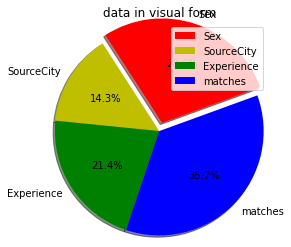

In [168]:
cols = ['Sex', 'SourceCity', 'Experience', 'matches']
proportions = [40, 20, 30, 50]
colors = ['r', 'y', 'g', 'b']

plt.pie(proportions, labels=cols, colors=colors,
        startangle=20, shadow=True, explode=(0.1, 0, 0, 0),
        radius=1.2, autopct='%1.1f%%')
plt.title('data in visual form')
plt.legend()
plt.show()


## Send a link to this file back to us for evaluation.
Use the share button on top and **make sure anyone with link can view this file** (not edit it).   
See help below.

Then send us the link using internshaala chat.

![picture](https://i.imgur.com/nCb9AZrl.jpg)